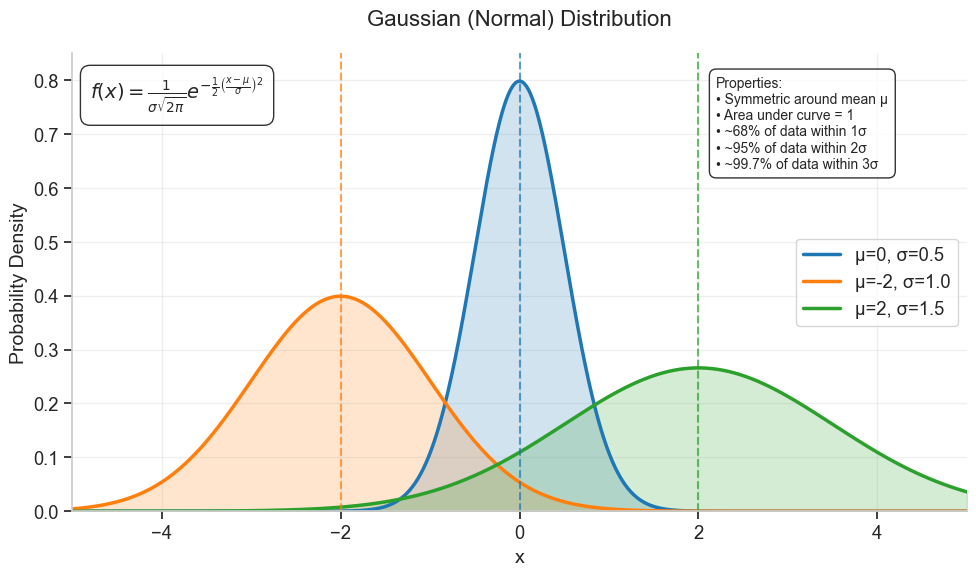

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the range for x values
x = np.linspace(-5, 5, 1000)

# Create multiple Gaussian distributions with different parameters
mu_values = [0, -2, 2]
sigma_values = [0.5, 1.0, 1.5]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = []

# Plot each Gaussian distribution
for i, (mu, sigma) in enumerate(zip(mu_values, sigma_values)):
    # Calculate the normal distribution PDF values
    y = stats.norm.pdf(x, mu, sigma)
    
    # Plot the distribution
    ax.plot(x, y, color=colors[i], linewidth=2.5, 
            label=f'μ={mu}, σ={sigma}')
    
    # Fill the area under the curve
    ax.fill_between(x, y, alpha=0.2, color=colors[i])

# Add vertical lines for the means
for i, mu in enumerate(mu_values):
    ax.axvline(x=mu, color=colors[i], linestyle='--', alpha=0.7)

# Add annotations and formatting
ax.set_title('Gaussian (Normal) Distribution', fontsize=16, pad=20)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='best', frameon=True)

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.85)

# Add formula annotation
formula = r'$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'
ax.text(0.02, 0.9, formula, transform=ax.transAxes, fontsize=14, 
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Add notes about the distribution properties
properties = (
    "Properties:\n"
    "• Symmetric around mean μ\n"
    "• Area under curve = 1\n"
    "• ~68% of data within 1σ\n"
    "• ~95% of data within 2σ\n"
    "• ~99.7% of data within 3σ"
)
ax.text(0.72, 0.95, properties, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

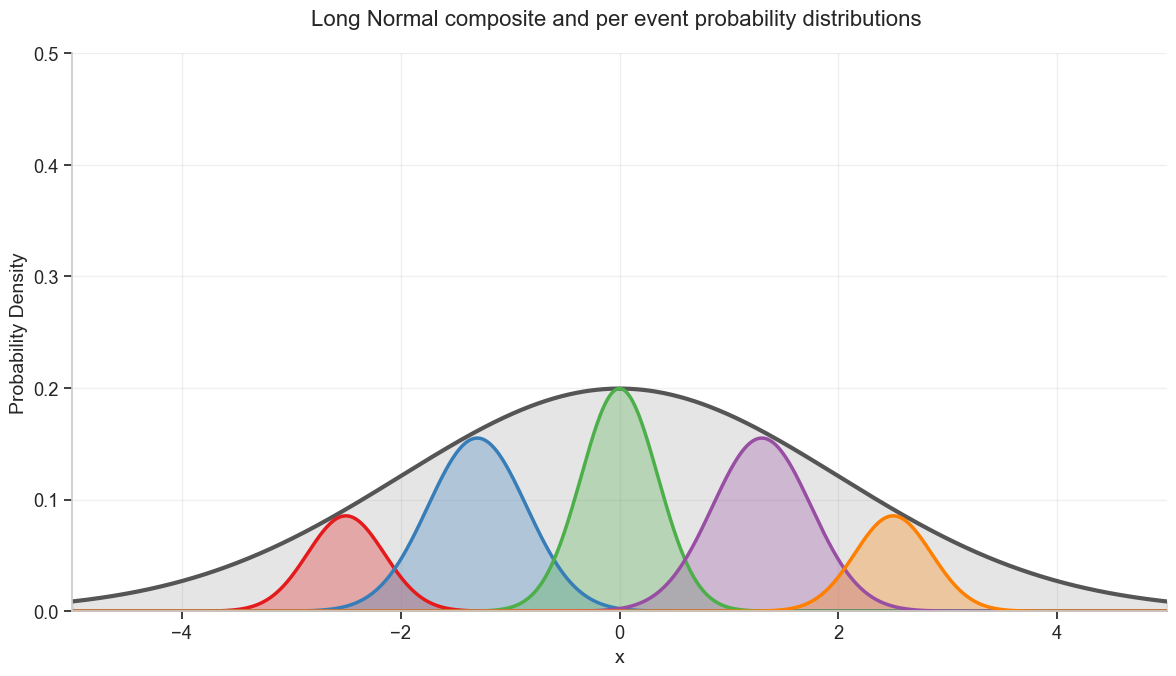

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Define the range for x values
x = np.linspace(-5, 5, 1000)

# Parameters for the large distribution
mu_large = 0
sigma_large = 2.0

# Calculate the large distribution PDF
y_large = stats.norm.pdf(x, mu_large, sigma_large)

# Parameters for the smaller distributions inside
# Means distributed within the large distribution
mu_small = [-2.5, -1.3, 0, 1.3, 2.5]
# Smaller standard deviations
sigma_small = [0.35, 0.45, 0.35, 0.45, 0.35]
# Weights for each distribution (must sum to less than or equal to 1)
weights = [0.15, 0.35, 0.35, 0.35, 0.15]
weights = [weight / 2 for weight in weights]

# Colors for the smaller distributions
colors_small = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

# Plot the large distribution
ax.plot(x, y_large, color='#555555', linewidth=3, linestyle='-', 
        label=f'Large: μ={mu_large}, σ={sigma_large}')
ax.fill_between(x, y_large, alpha=0.15, color='#555555')

# Plot the smaller distributions and their weighted versions
y_mixture = np.zeros_like(x)
for i, (mu, sigma, weight) in enumerate(zip(mu_small, sigma_small, weights)):
    # Calculate the normal distribution PDF
    y_small = stats.norm.pdf(x, mu, sigma)
    
    # Scale by weight
    y_weighted = y_small * weight
    
    # Add to mixture
    y_mixture += y_weighted
    
    # # Plot the original small distribution (dashed)
    # ax.plot(x, y_small, color=colors_small[i], linestyle='--', alpha=0.5, linewidth=1.5)
    
    # Plot the weighted small distribution (solid)
    ax.plot(x, y_weighted, color=colors_small[i], linewidth=2.5, 
            label=f'Comp {i+1}: μ={mu}, σ={sigma}, w={weight}')
    
    # Fill the area under the weighted curve
    ax.fill_between(x, y_weighted, alpha=0.3, color=colors_small[i])

# Plot the mixture
# ax.plot(x, y_mixture, color='black', linewidth=2.5, linestyle='--', 
#         label='Mixture of Components')

# Add vertical lines for the means of small distributions
# for i, mu in enumerate(mu_small):
#     ax.axvline(x=mu, color=colors_small[i], linestyle=':', alpha=0.7)

# Add annotations and formatting
ax.set_title('Long Normal composite and per event probability distributions ', fontsize=16, pad=20)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.grid(True, alpha=0.3)

# Create custom legend with spacing
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper right', frameon=True, fontsize=10)

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.5)

# Add mixture model formula annotation
# formula = r'$p(x) = \sum_{i=1}^{5} w_i \mathcal{N}(x|\mu_i,\sigma_i^2)$'
# ax.text(0.02, 0.95, formula, transform=ax.transAxes, fontsize=14, 
#         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# # Add explanatory text
# explanation = (
#     "This plot shows:\n"
#     "• One large Gaussian (gray)\n"
#     "• Five component distributions (colored)\n"
#     "• Dashed lines show unweighted components\n"
#     "• Solid colored lines show weighted components\n"
#     "• Black dashed line shows the mixture model"
# )
# ax.text(0.02, 0.82, explanation, transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()